## Goal
To implement a **Monte Carlo simulation** using historical stock data (from `yfinance`) to:
- Simulate possible **future price paths** based on past returns.
- Compare investment strategies like **Dollar-Cost Averaging (DCA) vs. Lump Sum Investing**.
- Evaluate long-term investing outcomes using probabilities.

## Step-by-Step Approach

1. Fetch historical stock prices using yfinance.
2. Calculate daily returns to model price movements.
3. Simulate future price paths using randomized daily returns (Monte Carlo).
4. Compare investment strategies (DCA vs. Lump Sum).

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Download S&P 500 data (or any stock)
ticker = "SPY"  # S&P 500 ETF
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")
data["Returns"] = data["Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


In [10]:
def monte_carlo_simulation(start_price, returns, days=252, num_simulations=1000):
    simulations = []
    
    for _ in range(num_simulations):
        future_prices = [start_price]
        for _ in range(days):
            random_return = np.random.choice(returns)
            next_price = future_prices[-1] * (1 + random_return)
            future_prices.append(next_price)
        simulations.append(future_prices)
    
    return np.array(simulations)

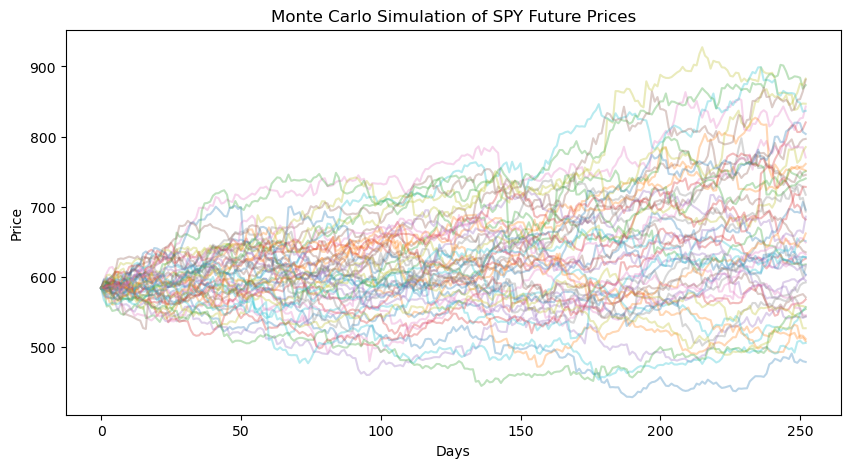

In [11]:
# Get last known stock price
start_price = data["Close"].iloc[-1]
returns = data["Returns"].dropna()

# Run Monte Carlo
simulated_prices = monte_carlo_simulation(start_price, returns)

# Plot a few simulations
plt.figure(figsize=(10, 5))
for sim in simulated_prices[:50]:  # Show 50 paths
    plt.plot(sim, alpha=0.3)
plt.title(f"Monte Carlo Simulation of {ticker} Future Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()